In [ ]:
import numpy as np
import pandas as pd

import os
import string
from string import digits
import re

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense, RepeatVector
from keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#lines=pd.read_csv("/content/drive/MyDrive/AI-2022 Ru 21st-May'24 11-1AM R BY/NLP resources/Hindi_English_Truncated_Corpus.csv",encoding='utf-8')
lines=pd.read_csv("Hindi_English_Truncated_Corpus.csv",encoding='utf-8')
lines.head()

source                                   english_sentence                                     hindi_sentence
0        ted  politicians do not have permission to do what ...  राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...
1        ted         I'd like to tell you about one such child,  मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2  indic2012  This percentage is even greater than the perce...   यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3        ted  what we really mean is that they're bad at not...     हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4  indic2012  .The ending portion of these Vedas is called U...        इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।

In [ ]:
lines.shape

(127607, 3)

In [ ]:
lines['source'].value_counts()

source
tides        50000
ted          39881
indic2012    37726
Name: count, dtype: int64

In [ ]:
lines=lines[lines['source']=='ted']

In [ ]:
lines.shape

(39881, 3)

In [ ]:
lines.head(20)

source                                   english_sentence                                     hindi_sentence
0     ted  politicians do not have permission to do what ...  राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर...
1     ted         I'd like to tell you about one such child,  मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
3     ted  what we really mean is that they're bad at not...     हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7     ted   And who are we to say, even, that they are wrong   और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13    ted                   So there is some sort of justice                                   तो वहाँ न्याय है
23    ted                                This changed slowly                               धीरे धीरे ये सब बदला
26    ted                               were being produced.                           उत्पन्न नहीं कि जाती थी.
30    ted        And you can see, this LED is going to glow.       और जैसा आप देख रहे है, ये एल.ई.डी. जल उठेगी।
32    ted  to turn on the lights or to bring him a glass ...    लाईट जलाने के लिए या उनके लिए पानी लाने के लिए,
35    ted                       Can you imagine saying that?                       क्या आप ये कल्पना कर सकते है
37    ted  Three: this is a good road in - right near whe...  तीसरी: ये हमारी फ़ैक्ट्री के पास की एक अपेक्षा...
39    ted                                  What's going on?”                                क्या हो रहा है ये?”
42    ted   There are also financial reforms in rural China.          ग्रामीण चीन में आर्थिक नवीनीकरण हुये हैं।
49    ted  the family planning started in Vietnam and the...  वियतनाम में परिवार योजना शुरू हो गई और उनके पर...
51    ted                    I mean, at that time, trust me,                      मेरा मतलब, उस समय, सही मानिए,
53    ted                                     Not only that,                                       बस वही नहीं,
55    ted  humans destroyed the commons that they depende...  मानवों ने उन ही साझे संसाधनों को नष्ट किया जिन...
56    ted  Almost goes to E, but otherwise the play would...  रचना करीब करीब ई तक जाती है, मगर तब तो नाटक ख़...
63    ted  So I want to share with you a couple key insights      मैं आपके साथ कुछ मुख्य सूत्र बाँटना चाहता हूँ
66    ted  Many countries in the [unclear], they need leg...  [अस्पष्ट] के बहुत सारे राष्ट्रों को मान्यता चा...

In [ ]:
lines.isna().sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [ ]:
lines.duplicated().sum()

np.int64(1078)

In [ ]:
lines.drop_duplicates(inplace=True)
lines.shape

(38803, 3)

* ### Let us pick any 25000 rows from the dataset.

In [ ]:
lines=lines.sample(n=25000,random_state=42) # random 25000 data is selected because this is a huge dataset.
lines.shape # now this is not a huge data for a model. Model needs alot more data. but because of lack of resources,
# we r considering these many rows.

(25000, 3)

### Preprocessing

In [ ]:
# Lowercase all characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.lower())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.lower()) # in hindi there is no concept of lower case,
# still doing it.

In [ ]:
# Remove quotes
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub("'", '', x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

In [ ]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.translate(remove_digits))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.translate(remove_digits))

lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))


In [ ]:
# Remove extra spaces
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.strip())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.strip())
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
lines.head()

source                                   english_sentence                                     hindi_sentence
82040     ted  we still dont know who her parents are who she is  हम अभी तक नहीं जानते हैं कि उसके मातापिता कौन ...
85038     ted                                        no keyboard                                  कोई कुंजीपटल नहीं
58018     ted                    but as far as being a performer                        लेकिन एक कलाकार होने के साथ
74470     ted                        and this particular balloon                                 और यह खास गुब्बारा
122330    ted  and its not as hard as you think integrate cli...  और जितना आपको लगता है यह उतना कठिन नहीं हैअपने...

In [ ]:
lines['length_eng_sentence']=lines['english_sentence'].apply(lambda x:len(x.split(" ")))
lines['length_hin_sentence']=lines['hindi_sentence'].apply(lambda x:len(x.split(" ")))

In [ ]:
lines.head()

source                                   english_sentence                                     hindi_sentence  length_eng_sentence  length_hin_sentence
82040     ted  we still dont know who her parents are who she is  हम अभी तक नहीं जानते हैं कि उसके मातापिता कौन ...                   11                   14
85038     ted                                        no keyboard                                  कोई कुंजीपटल नहीं                    2                    3
58018     ted                    but as far as being a performer                        लेकिन एक कलाकार होने के साथ                    7                    6
74470     ted                        and this particular balloon                                 और यह खास गुब्बारा                    4                    4
122330    ted  and its not as hard as you think integrate cli...  और जितना आपको लगता है यह उतना कठिन नहीं हैअपने...                   16                   18

In [ ]:
# max to max we r considering a sentence length of 20.
lines=lines[lines['length_eng_sentence']<=20]
lines=lines[lines['length_hin_sentence']<=20]

In [ ]:
lines.shape

(24916, 5)

In [ ]:
print("maximum length of Hindi Sentence ",max(lines['length_hin_sentence']))
print("maximum length of English Sentence ",max(lines['length_eng_sentence']))

maximum length of Hindi Sentence  20
maximum length of English Sentence  20


In [ ]:
lines.head()

source                                   english_sentence                                     hindi_sentence  length_eng_sentence  length_hin_sentence
82040     ted  we still dont know who her parents are who she is  हम अभी तक नहीं जानते हैं कि उसके मातापिता कौन ...                   11                   14
85038     ted                                        no keyboard                                  कोई कुंजीपटल नहीं                    2                    3
58018     ted                    but as far as being a performer                        लेकिन एक कलाकार होने के साथ                    7                    6
74470     ted                        and this particular balloon                                 और यह खास गुब्बारा                    4                    4
122330    ted  and its not as hard as you think integrate cli...  और जितना आपको लगता है यह उतना कठिन नहीं हैअपने...                   16                   18

In [ ]:
# Next we will convert text into numbers. Both the languages will be converted seperately.
# Also from the above o/p we can see sentences are of different length, so in this step we will make sentences
# of equal length.
# Tokenization and padding
def tokenize_and_pad(lines, column, max_length):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines[column])
    sequences = tokenizer.texts_to_sequences(lines[column])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return tokenizer, padded_sequences

In [ ]:
max_length_src = 20
max_length_tar = 20

In [ ]:
eng_tokenizer, eng_sequences = tokenize_and_pad(lines, 'english_sentence', max_length_src)
hin_tokenizer, hin_sequences = tokenize_and_pad(lines, 'hindi_sentence', max_length_tar)

In [ ]:
# next we r creating seperate vocabulary for english and hindi tokens.
num_encoder_tokens = len(eng_tokenizer.word_index) + 1
num_decoder_tokens = len(hin_tokenizer.word_index) + 1

In [ ]:
# Checking the english and hindi vocabulary size.
print("English vocab size",num_encoder_tokens)
print("Hindi vocab size",num_decoder_tokens)

English vocab size 13985
Hindi vocab size 17471


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(eng_sequences, hin_sequences, test_size=0.2, random_state=42)

In [ ]:
'''
Understanding the architecture once again. We convert i/p sentence into embeddings and give to encoder.
Which generates context vector ad give to decoder which gives corresponding sentence as o/p.
Now the decoder also gives numbers as o/p just as in multiclass classification. So
softmax will be applied there. So after decoder o/p we have a softmax layer.
So all the individual tokens in hindi vocab acts as class.
'''

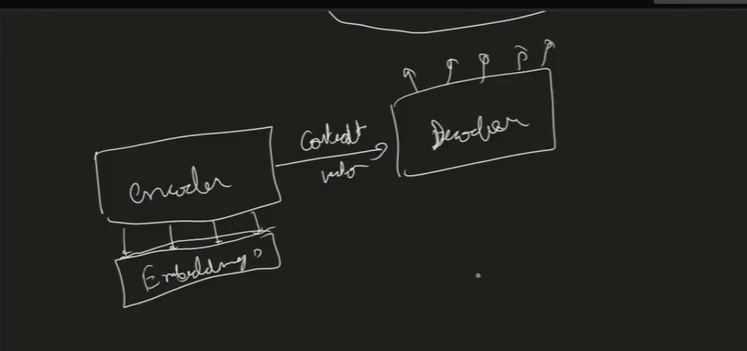

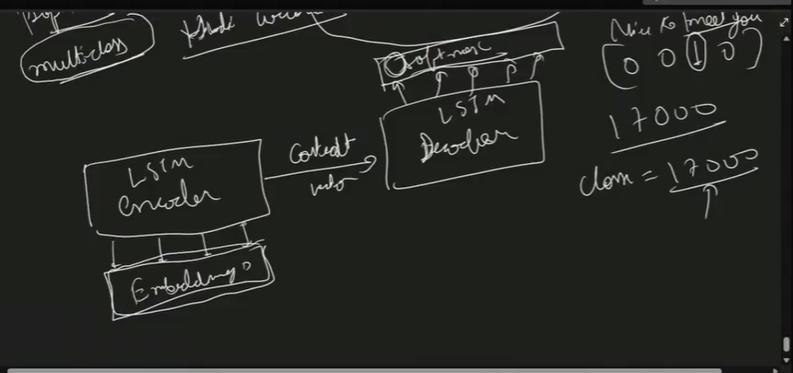

In [ ]:
'''
model = Sequential()
model.add(Embedding(num_encoder_tokens, 100, input_length=20, mask_zero=True)) # 1st embedding layer
model.add(LSTM(100)) # then lstm layer
model.add(RepeatVector(20)) # this is a context vector
# from here we have decoder.
model.add(LSTM(100, return_sequences=True))
model.add(Dense(num_decoder_tokens,activation='softmax')) # then adding softmax layer

model.summary()
'''
model = Sequential()
model.add(Embedding(num_encoder_tokens, 100, input_length=20, mask_zero=True)) # Keep mask_zero=True for Embedding#
# mask_zero
model.add(LSTM(100, recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, use_cudnn=False)) # Set use_cudnn=False
model.add(RepeatVector(20))
model.add(LSTM(100, return_sequences=True, recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, use_cudnn=False)) # Set use_cudnn=False
model.add(Dense(num_decoder_tokens,activation='softmax'))
# the number of nodes in Dense is equivalent to hindi vocabulary size i.e.num_decoer_tokens
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_3 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5690 - loss: 4.8762 - val_accuracy: 0.5863 - val_loss: 3.1660
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.5884 - loss: 3.0663 - val_accuracy: 0.5905 - val_loss: 3.1109
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5920 - loss: 2.9895 - val_accuracy: 0.5914 - val_loss: 3.1242
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5923 - loss: 2.9616 - val_accuracy: 0.5909 - val_loss: 3.1294
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5944 - loss: 2.9136 - val_accuracy: 0.5888 - val_loss: 3.1399
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5953 - loss: 2.8825 - val_accuracy: 0.5867 - val_loss: 3.1571
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5959 - loss: 2.8559 - val_accuracy: 0.5869 - val_loss: 3.1638
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5991 - loss: 2.8173 - val

In [ ]:
preds = model.predict(X_test[:100,:])
preds

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step


array([[[4.78373421e-03, 1.96773838e-03, 1.53375849e-01, ...,
         1.19385163e-06, 1.87841778e-08, 2.02354062e-08],
        [5.59545821e-03, 7.11991545e-03, 1.27232997e-02, ...,
         3.01946557e-06, 2.26657058e-08, 2.41606291e-08],
        [6.67245686e-03, 2.19030418e-02, 7.34637724e-03, ...,
         6.53648340e-06, 3.80784577e-08, 3.87043748e-08],
        ...,
        [9.98765707e-01, 1.52641820e-04, 3.53979522e-05, ...,
         3.67565804e-11, 8.78344543e-13, 1.08769547e-12],
        [9.98777688e-01, 1.50715292e-04, 3.54995282e-05, ...,
         3.62674439e-11, 8.65204284e-13, 1.07146009e-12],
        [9.98784840e-01, 1.49521249e-04, 3.55660632e-05, ...,
         3.59618654e-11, 8.56983755e-13, 1.06130198e-12]],

       [[3.95358680e-03, 1.38346606e-03, 1.91698477e-01, ...,
         4.71411511e-07, 7.95920840e-09, 8.77274964e-09],
        [1.81603548e-03, 7.45745655e-03, 1.29300514e-02, ...,
         1.35493087e-06, 7.94357735e-09, 8.83155593e-09],
        [8.78121296e-04, 

In [ ]:
predictions = np.argmax(preds, axis=1)

predictions

array([[19,  4,  0, ...,  2,  2,  2],
       [19,  8,  0, ...,  4,  6,  6],
       [19,  3,  0, ...,  2,  0,  0],
       ...,
       [19,  5,  0, ...,  2,  3,  1],
       [19,  7,  0, ...,  3,  5,  5],
       [19,  5,  0, ...,  2,  3,  3]])

In [ ]:
def get_word(n,tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [ ]:
pred_text = []
for i in predictions:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], hin_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1],hin_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if (t==None):
                temp.append('')
            else:
                temp.append(t)
    print(temp)
    pred_text.append(' '.join(temp))

['पर', 'में', '', 'और', 'के', 'में', 'और', '', '', '', 'और', '', 'के', '', '', '', '', '', '', '', '', 'के', '', '', 'के', 'में', '', 'के', '', 'और', 'है', 'में', '', 'में', '', '', '', 'में', 'हैं', '', 'के', '', 'में', '', '', 'में', 'और', 'में', '', 'के', '', 'और', 'में', '', 'है', '', '', 'है', '', '', '', 'में', '', 'है', '', '', 'के', '', '', 'है', '', '', 'है', '', 'के', 'है', '', '', 'और', 'है', '', 'में', 'है', '', 'में', 'और', '', 'के', 'है', '', '', 'में', 'और', 'है', '', '', 'के', 'है', 'में', 'और', 'है', '', '', '', 'में', 'के', 'है', 'के', 'में', 'और', 'है', 'और', '', 'में', '', 'के', 'और', 'है', '', '', 'के', 'और', '', '', 'के', '', 'है', 'के', 'में', 'है', '', '', '', 'और', 'में', '', '', 'के', '', 'में', '', '', 'है', 'के', 'है', 'के', 'में', '', 'में', '', 'है', '', 'है', '', '', 'है', 'के', '', '', 'और', '', 'में', 'है', '', '', '', '', 'और', '', 'के', '', '', '', 'में', 'है', 'और', 'में', 'के', '', '', 'और', '', 'और', 'है', 'और', '', 'के', '', 'है', 'के', 'है', 'के'

In [ ]:
pred_text[0] # this is the 1st prediction of our model.
# this is a wrong o/p but model gave some o/p in hindi.
'''
this can be because our model architecture is very simple. U can add mode LSTM layers with more number of epochs.
'''

'पर में  और के में और    और  के         के   के में  के  और है में  में    में हैं  के  में   में और में  के  और में  है   है    में  है   के   है   है  के है   और है  में है  में और  के है   में और है   के है में और है    में के है के में और है और  में  के और है   के और   के  है के में है    और में   के  में   है के है के में  में  है  है   है के   और  में है     और  के    में है और में के   और  और है और  के  है के है के में और के और के में है में और  के और   और में के और है और के में है  और में है  के  है और है के   है और  के है में और के  के   के  और  में है  और के और   है और के में  और   और  के में  है  में और   में   और  है में है के है  के में के और  है  के  है और के और  है और है  और है में   है के है और के और है के है के और  के   है  और के  है के और   के है में   और के है और  है और है  है और   है  के  है    और है में और के में  में है और  और के है  और  के  के  में और  है में के  और के  और  के   और के  में के और के है के   और है में के में है के  में और के और   में है में  है और 

In [ ]:
for i in y_test[0]:
  t = get_word(i,hin_tokenizer)
  print(t)

इस
की
कोई
ज़रूरत
ही
नहीं
है
कि
None
None
None
None
None
None
None
None
None
None
None
None
